In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
diabetes=pd.read_csv("diabetes_data_upload.csv")

In [103]:
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [104]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C268987850>]],
      dtype=object)

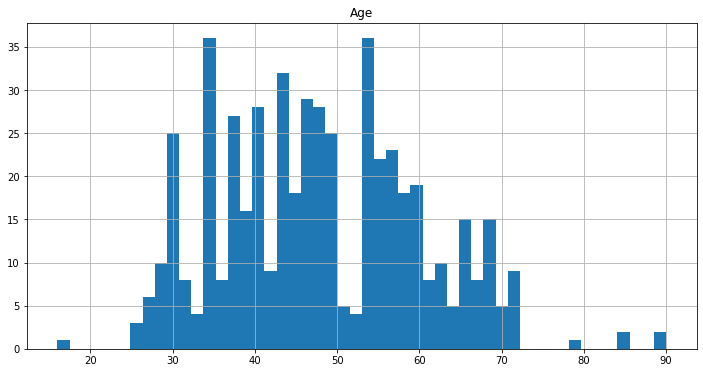

In [105]:
diabetes.hist(bins=50,figsize=(12,6))                 
# only 1 numerical column,either we use seaborn to plot or convert all categorical columns to numerical columns

In [106]:
diabetes["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [107]:
cat_features=list(diabetes.columns.values[1:diabetes.shape[1]])
cat_features

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [108]:
diabetes_cat=diabetes.select_dtypes(exclude=['int64'])# trying for the total data 

In [109]:
diabetes_cat.head(10)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [110]:
#diabetes_cat.iloc[:,1:]=(diabetes_cat.iloc[:,1:]=='Yes')
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for column in cat_features:
    diabetes_cat[column]=enc.fit_transform(diabetes_cat[column])

<ipython-input-110-6a0e0507caf9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_cat[column]=enc.fit_transform(diabetes_cat[column])


In [111]:
diabetes_cat.head(10)

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


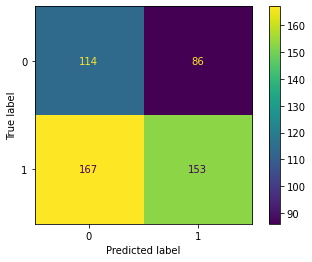

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We are trying to match single variable as a predictor and see its performance .

cm = confusion_matrix(diabetes_cat['class'], diabetes_cat['delayed healing'])
cm_display = ConfusionMatrixDisplay(cm).plot()

Text(0.5, 0.98, 'Single attribute predictor')

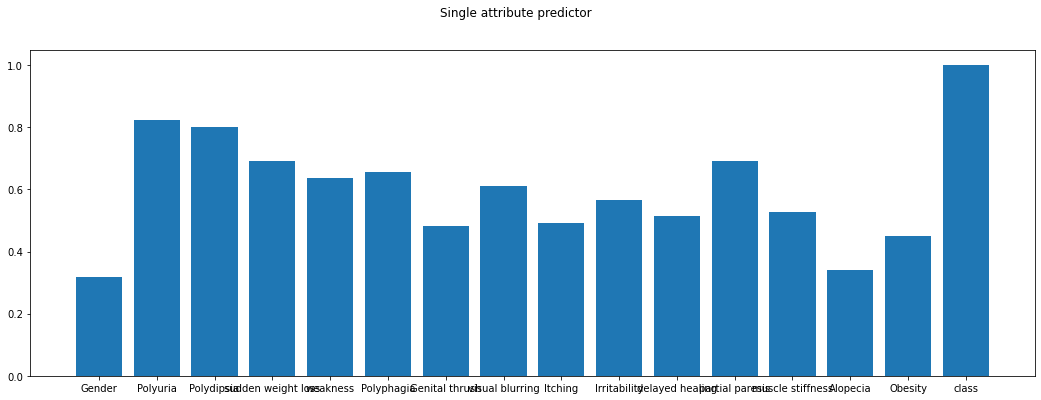

In [113]:
def performance(y_real,y_pred):      # performance based on user defined function with separate  attributes as predictors
    TP=0
    FP=0
    FN=0
    TN=0
    for i in range(0,len(y_real)):
        if (y_real[i]==y_pred[i]) and (y_real[i]==1):
            TP=TP+1
        elif (y_real[i]!=y_pred.iloc[i]) and (y_real[i]==1):
            FP=FP+1
        elif (y_real[i]!=y_pred[i]) and (y_real[i]==0):
            FN=FN+1
        elif (y_real[i]==y_pred[i]) and (y_real[i]==0):
            TN=TN+1
    acc=(TP+TN)/(TP+TN+FP+FN)
    return acc

acc_score={}
for column in cat_features:
    score=performance(diabetes_cat['class'],diabetes_cat[column])
    acc_score[column]=score


names=list(acc_score.keys())
values=list(acc_score.values())
fig,axs=plt.subplots(1,1,figsize=(18,6))
axs.bar(names,values)
fig.suptitle('Single attribute predictor')
# Polyuria,Polydipsia,partial paresis turns out to be important single attribute predictor 

In [114]:
corr_matrix=diabetes_cat.corr()

In [115]:
corr_matrix['class'].sort_values(ascending=False)  # almost matches our single attribute predictor

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64

In [116]:
diabetes["Age"]=pd.cut(diabetes["Age"],bins=[15,40,55,70,90],labels=[1,2,3,4])


In [117]:
diabetes["Age"].value_counts()

2    212
1    168
3    126
4     14
Name: Age, dtype: int64

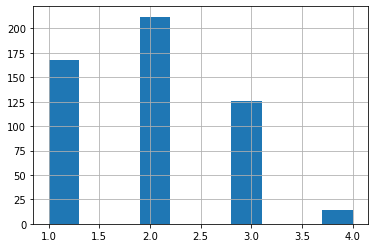

In [118]:
diabetes["Age"].hist()

In [119]:
encoder=LabelEncoder()
for column in cat_features:
    diabetes[column]=encoder.fit_transform(diabetes[column])

In [120]:
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,3,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,2,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [121]:
type(diabetes["Age"])

pandas.core.series.Series

In [122]:
diabetes_age=diabetes[["Age"]]

In [123]:
from sklearn.preprocessing import OneHotEncoder
onehotenc=OneHotEncoder(sparse=False)

Diabetes_age_onehot=onehotenc.fit_transform(diabetes_age)
Diabetes_age_onehot[:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [124]:
age=Diabetes_age_onehot.tolist()

In [125]:
df=pd.DataFrame(age, columns =['Age1', 'Age2','Age3','Age4']) 
df.head()

,Age1,Age2,Age3,Age4
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [126]:
diabetes=diabetes.drop("Age",axis=1)
diabetes_prepared=pd.concat([df,diabetes],axis=1)

In [127]:
diabetes_prepared.head()

,Age1,Age2,Age3,Age4,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1.0,0.0,0.0,0.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.0,1.0,0.0,0.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.0,1.0,0.0,0.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.0,0.0,1.0,0.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [128]:
target=diabetes_prepared["class"]
diabetes_prepared=diabetes_prepared.drop("class",axis=1)

In [129]:
#fig,axes=plt.subplots(1,len(cat_features))
from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in sss.split(diabetes_prepared,target):
    X_train,X_test=diabetes_prepared.iloc[train_index],diabetes_prepared.iloc[test_index]
    y_train,y_test=target.iloc[train_index],target.iloc[test_index]

In [130]:
X_test.shape

(104, 19)

In [131]:
y_train.shape

(416,)

In [132]:
# Now apply models 

from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [133]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.88489209, 0.87769784, 0.9057971 ])

In [134]:
from sklearn.model_selection import cross_val_predict  # return value of test  fold on each fold

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [135]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train,y_train_pred)        # fairly high precision

0.9038461538461539

In [136]:
recall_score(y_train,y_train_pred)          # Both appears to be high :)

0.91796875

In [137]:
# Lets now test on the basis of roc_auc score
from sklearn.metrics import roc_auc_score

SGD_score=roc_auc_score(y_train,y_train_pred)            # seems SGDClassifier is good enough.But can we improve more?
SGD_score

0.880859375

In [138]:
# Let's try another model
from sklearn.ensemble import RandomForestClassifier

rfc_clf=RandomForestClassifier(random_state=42)
y_proba_forest=cross_val_predict(rfc_clf,X_train,y_train,cv=3,method='predict_proba')

In [139]:
# select probability of positive class as the score
y_score_forest=y_proba_forest[:,1]
rf_score=roc_auc_score(y_train,y_score_forest)  # Whaaaat!!!!!,such good value,let's try precision and recall.
rf_score

0.99481201171875

In [140]:
# for precision,value should be binary
for i in range(len(y_score_forest)):
    if y_score_forest[i]>=0.5:
        y_score_forest[i]=1
    else:
        y_score_forest[i]=0

precision_score(y_train,y_score_forest)

0.9798387096774194

In [141]:
recall_score(y_train,y_score_forest)         # Aaaah!!! improved.better than SGDClassifier,but is it overfitting?

0.94921875

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

In [143]:
LR_clf=LogisticRegression()
LR_clf.fit(X_train,y_train)

y_pred_LR=cross_val_predict(LR_clf,X_train,y_train,cv=3)
lr_score=roc_auc_score(y_train,y_pred_LR)
lr_score

0.916796875

In [144]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

y_pred_knn=cross_val_predict(knn_clf,X_train,y_train,cv=3)
knn_score=roc_auc_score(y_train,y_pred_knn)
knn_score

0.927734375

In [145]:
svc_clf=SVC()
svc_clf.fit(X_train,y_train)

y_pred_svc=cross_val_predict(svc_clf,X_train,y_train,cv=3)
svc_score=roc_auc_score(y_train,y_pred_svc)
svc_score

0.961328125

In [146]:
perceptron=Perceptron()
perceptron.fit(X_train,y_train)

y_pred_perceptron=cross_val_predict(perceptron,X_train,y_train,cv=3)
perceptron_score=roc_auc_score(y_train,y_pred_perceptron)   
perceptron_score

0.841015625

In [147]:
linearsvc=LinearSVC()
linearsvc.fit(X_train,y_train)

y_pred_linearsvc=cross_val_predict(linearsvc,X_train,y_train,cv=3)
linear_svc_score=roc_auc_score(y_train,y_pred_linearsvc)
linear_svc_score

0.8941406250000001

In [148]:
NB_clf=GaussianNB()
NB_clf.fit(X_train,y_train)

y_pred_nb=cross_val_predict(NB_clf,X_train,y_train,cv=3)
nb_score=roc_auc_score(y_train,y_pred_nb)
nb_score

0.862109375

In [154]:
models=pd.DataFrame({'Model':['Stochastic Gradient Descent','Random Forest','Logistic Regression','K Nearest Neighbours','SVC','Perceptron','Linear SVC','Naive Bayes'],'ROC_AUC':[SGD_score,rf_score,lr_score,knn_score,svc_score,perceptron_score,linear_svc_score,
                                            nb_score]})

models.sort_values(by='ROC_AUC', ascending=False)

,Model,ROC_AUC
1,Random Forest,0.994812
4,SVC,0.961328
3,K Nearest Neighbours,0.927734
2,Logistic Regression,0.916797
6,Linear SVC,0.894141
0,Stochastic Gradient Descent,0.880859
7,Naive Bayes,0.862109
5,Perceptron,0.841016


In [155]:
my_model=RandomForestClassifier(random_state=42)
my_model.fit(X_train,y_train)

y_pred=my_model.predict(X_test)
model_acc=sum(y_test==y_pred)/len(y_test)
model_acc                                         # model works well on unseen data..Trained  succcessfully :)

0.9807692307692307